<h1><center>My first public notebook</center></h1>

# 0 Introduction 📒

After looking at diverse notebooks, competitions code and courses on Kaggle. I am going into it and I am writing my first public notebook. 
In this notebook I will use the wine quality dataset and perform the following tasks :
* Exploratory Data Analysis
* Train a ML algorithm to predict the quality of a wine
* Train different models and compare them on this dataset

The goal for me is to use data science tools I have learn on a real life dataset.

# 1 Import Libraries and Load the Dataset 📚

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [6]:
df = pd.read_csv("input/WineQT.csv", index_col = 'Id')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


# 2 Exploratory Data Analysis (EDA) 📊

In this part I will perform transormation on the data in order to deal with missing data and see if there are any obvious correlation between variables and the quality of the wine.

## 2.1 Checking missing Data 

In [7]:
df.replace('?', np.NaN, inplace=True)

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Good news, there are no missing values in this dataset, So we can already move to the data analysis part, and the data visualisation part.

## 2.2 Data visualisation 

Let's dive into the data visualisation by plotting a correlation matrix as well as the distribution in the dataset.

In [10]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [11]:
df['quality'] -= 3

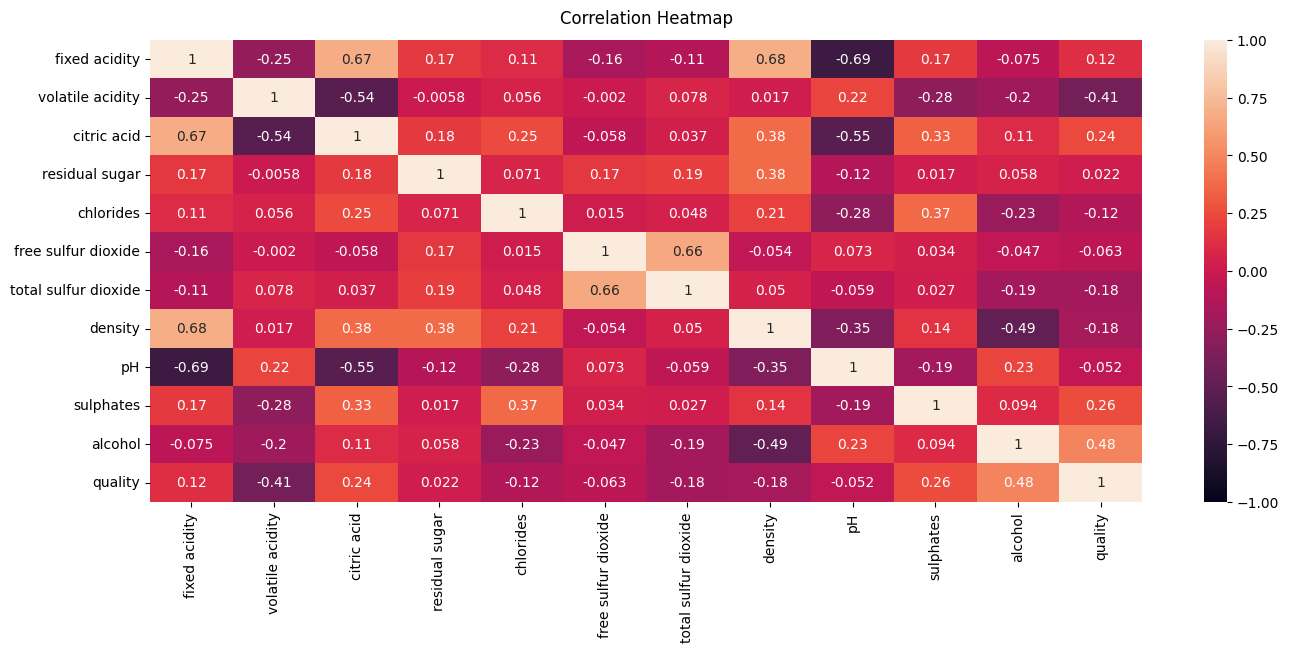

In [12]:
corrM = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corrM, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

[]

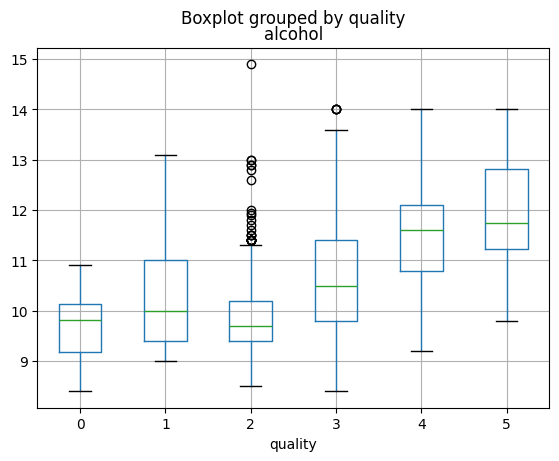

In [13]:
boxplot = df.boxplot(column=['alcohol'],by="quality")
boxplot.plot()

[]

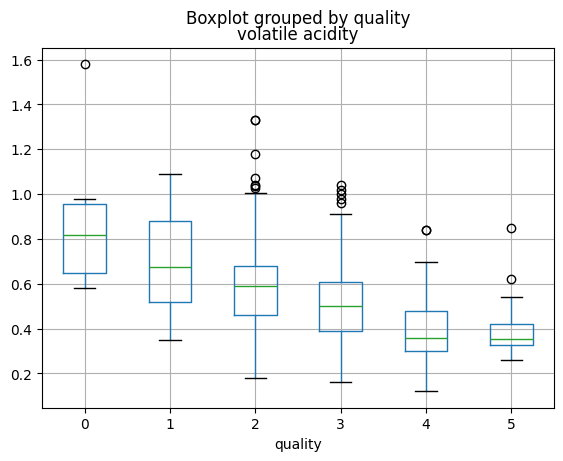

In [14]:
boxplot = df.boxplot(column=['volatile acidity'],by="quality")
boxplot.plot()

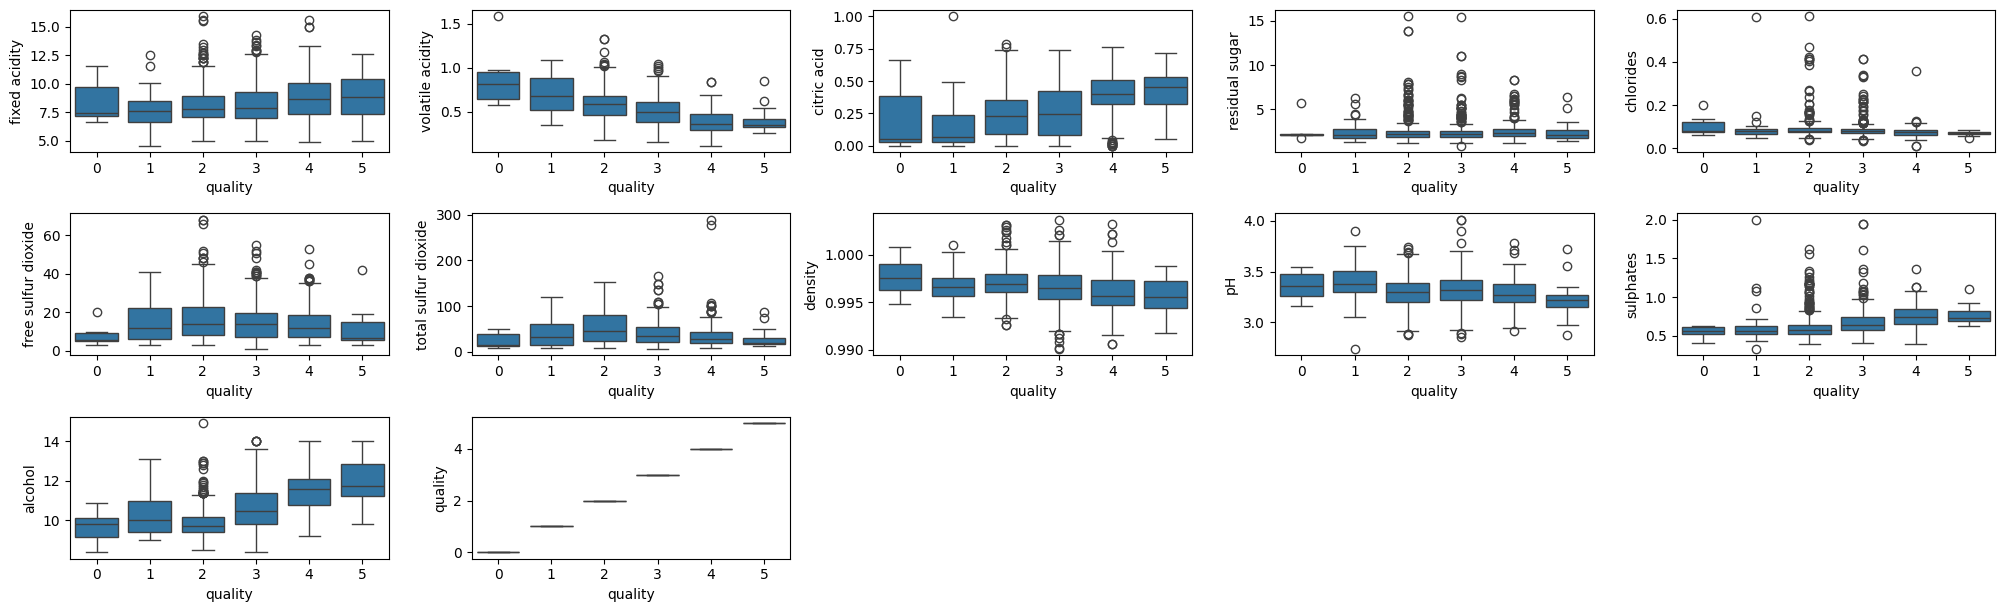

In [15]:
fig = plt.figure(figsize=(20,20))
for index in range(len(df.columns)):
    plt.subplot(10,5,index+1)
    sns.boxplot(y=df.iloc[:,index], x='quality', data=df.dropna())
fig.tight_layout(pad=1.0)

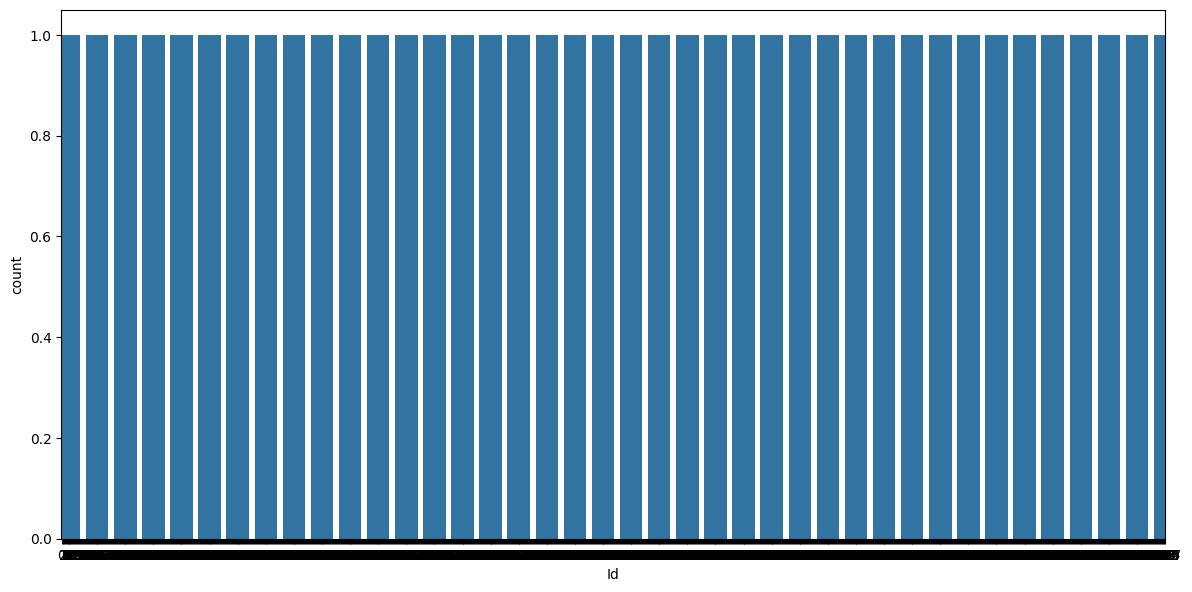

In [16]:
fig = plt.figure(figsize=(12,6))
sns.countplot(df['quality'])
fig.tight_layout(pad=1.0)


We can see some obvious correlation between the quality and both the volatile acidity (negative correlation) and the alcohol 

# 3 Builiding Machine Learning Model 

In order to build the machine learning model I need to perform few tasks such as splitting the dataset between training set, validation set and testing set. then I apply normalization to avoid scale problems.

## 3.1 Split the dataset

In [17]:
X = df.drop(columns = ['quality']).copy()
X_std =(X-X.mean())/X.std()
y = df['quality']

In [18]:
cols = X.select_dtypes(np.number).columns
transformer = RobustScaler().fit(X[cols])
X[cols] = transformer.transform(X[cols])

In [19]:
train_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# Hyperparameters tuning 📊

In [20]:
xgb1 = XGBClassifier(booster='gbtree', objective='multi:merror', eval_metric = 'merror')

In [21]:
# XGBoost



# n_jobs=-1 to allow run it on all cores
param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}


xgb_clas = RandomizedSearchCV(estimator = xgb1, param_distributions = param_lst,
                              n_iter = 100, cv = 5)

xgb_search = xgb_clas.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBClassifier(**best_param)

In [22]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

etc = RandomizedSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
etc_search = etc.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = etc_search.best_params_
etc = ExtraTreesClassifier(**best_param)

In [23]:
xgb.fit(X_train, y_train)   
preds = xgb.predict(X_test) 
accuracy = accuracy_score(preds,y_test)
print("accuracy : ", accuracy)


etc.fit(X_train,y_train)
preds = etc.predict(X_test)
accuracy = accuracy_score(preds,y_test)
print("accuracy : ", accuracy)

accuracy :  0.5889212827988338
accuracy :  0.6180758017492711


# 5 Conclusion

I have implemented different machine learning models (XGBoost and Extra Tree) and trained these models to best fit the data. I have also used Cross Validation and hyperparamaters tuning using a "real dataset". Even though this dataset seem nice (no missing value, only numerical data...) it's an interesting training, and I'll pursue my learning journey by practicing with new datasets or competitions. To have better results it would be interesting to ensemble both models in order to get the best prediction. 

Because this is my first public notebook, please feel free to suggest any improvements in the comments ! 

# 6 References

> This dataset is also available from Kaggle & UCI machine learning repository : https://archive.ics.uci.edu/ml/datasets/wine+quality.

> I inspired from this notebook for some things : https://www.kaggle.com/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85

> Using Kfold with random forest with this notebook : https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

> XGboost, Cross validation and hyperparameters tuning  : https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance
https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

> Naive Bayes Algorithms : https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python